In [1]:
import sys
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
FONTSIZE=20

In [3]:
# set plotting parameters
COLORS = {'a':'#117733', 
          'b':'#96CAA7',
          'lr':'#88CCEE',#882255
          'svm':'#CC6677',
          'optimal': '#D6BF4D',
          'feature_1':'#882255', #332288
          'people':'#882255', #AA4499',
          'stats':'#44AA99', 
          'feature_2':'#44AA99',
          'simple_grammar_constrained_noncompositonal':'#EF9EBB',
          'feature_3':'#E2C294', #'#0571D0', 
          'metal':'#DA9138', #"#D55E00", 
          'people2': '#748995',
          'metal2': '#173b4f'
          }
FONTSIZE=20

### ERMI

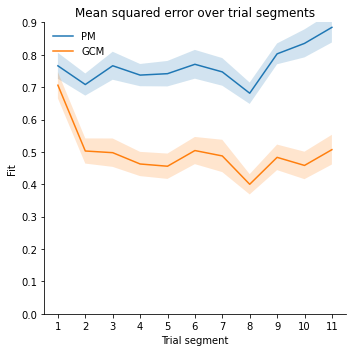

In [21]:
# load r2s=r2s, lls=lls, params=np.stack(params_list), opt_method=opt_method from gcm_humans
fits_gcm = np.load('../data/fitted_simulation/devraj2022_gcm_runs=1_iters=10_blocks=11_loss=mse_transfer_model=ermi.npz')
fits_pm = np.load('../data/fitted_simulation/devraj2022_pm_runs=1_iters=10_blocks=11_loss=mse_transfer_model=ermi.npz')
mses_gcm = fits_gcm['lls']
mses_pm = fits_pm['lls']
# mean mses across participants: mses are of shape (n_runs=1, n_participants, n_conditions=1, n_blocks)
mses_gcm = np.squeeze(mses_gcm)
mses_pm = np.squeeze(mses_pm)
# std error of mean across participants
stds_gcm = np.std(mses_gcm, axis=0)/np.sqrt(len(mses_gcm)-1)
stds_pm = np.std(mses_pm, axis=0)/np.sqrt(len(mses_pm)-1)
# plot mean mses across participants for each trial segment for both models
f, ax = plt.subplots(1, 1, figsize=(5,5))
sns.lineplot(x=np.arange(11)+1, y=np.mean(mses_pm, axis=0), ax=ax, label='PM')
sns.lineplot(x=np.arange(11)+1, y=np.mean(mses_gcm, axis=0), ax=ax, label='GCM')
# add standard error of mean as error bars
ax.fill_between(np.arange(11)+1, np.mean(mses_pm, axis=0)-stds_pm, np.mean(mses_pm, axis=0)+stds_pm, alpha=0.2)
ax.fill_between(np.arange(11)+1, np.mean(mses_gcm, axis=0)-stds_gcm, np.mean(mses_gcm, axis=0)+stds_gcm, alpha=0.2)
ax.set_xlabel('Trial segment')
ax.set_ylabel('Fit')
ax.set_ylim([0, .9])
ax.set_xticks(np.arange(11)+1)
ax.set_xticklabels(np.arange(11)+1)
# remove bounding box around the legend
ax.legend(frameon=False)
ax.set_title('Mean squared error over trial segments')
sns.despine()
f.tight_layout()
plt.show()


### Synthetic Linear

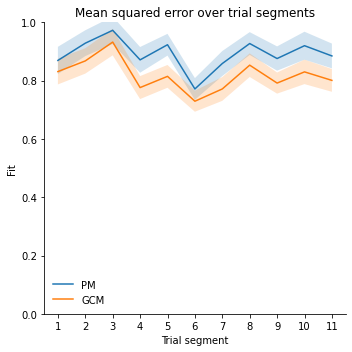

In [4]:
# load r2s=r2s, lls=lls, params=np.stack(params_list), opt_method=opt_method from gcm_humans
fits_gcm = np.load('../data/fitted_simulation/devraj2022_gcm_runs=1_iters=10_blocks=11_loss=mse_transfer_model=synthetic.npz')
fits_pm = np.load('../data/fitted_simulation/devraj2022_pm_runs=1_iters=10_blocks=11_loss=mse_transfer_model=synthetic.npz')
mses_gcm = fits_gcm['lls']
mses_pm = fits_pm['lls']
# mean mses across participants: mses are of shape (n_runs=1, n_participants, n_conditions=1, n_blocks)
mses_gcm = np.squeeze(mses_gcm)
mses_pm = np.squeeze(mses_pm)
# std error of mean across participants
stds_gcm = np.std(mses_gcm, axis=0)/np.sqrt(len(mses_gcm)-1)
stds_pm = np.std(mses_pm, axis=0)/np.sqrt(len(mses_pm)-1)
# plot mean mses across participants for each trial segment for both models
f, ax = plt.subplots(1, 1, figsize=(5,5))
sns.lineplot(x=np.arange(11)+1, y=np.mean(mses_pm, axis=0), ax=ax, label='PM')
sns.lineplot(x=np.arange(11)+1, y=np.mean(mses_gcm, axis=0), ax=ax, label='GCM')
# add standard error of mean as error bars
ax.fill_between(np.arange(11)+1, np.mean(mses_pm, axis=0)-stds_pm, np.mean(mses_pm, axis=0)+stds_pm, alpha=0.2)
ax.fill_between(np.arange(11)+1, np.mean(mses_gcm, axis=0)-stds_gcm, np.mean(mses_gcm, axis=0)+stds_gcm, alpha=0.2)
ax.set_xlabel('Trial segment')
ax.set_ylabel('Fit')
ax.set_ylim([0, 1.])
ax.set_xticks(np.arange(11)+1)
ax.set_xticklabels(np.arange(11)+1)
# remove bounding box around the legend
ax.legend(frameon=False)
ax.set_title('Mean squared error over trial segments')
sns.despine()
f.tight_layout()
plt.show()


### Synthetic Non-linear

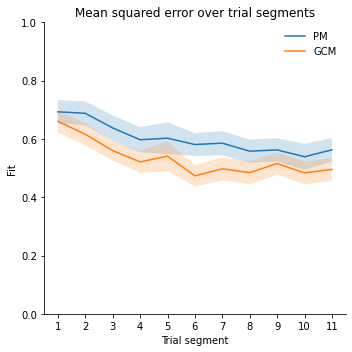

In [5]:
# load r2s=r2s, lls=lls, params=np.stack(params_list), opt_method=opt_method from gcm_humans
fits_gcm = np.load('../data/fitted_simulation/devraj2022_gcm_runs=1_iters=10_blocks=11_loss=mse_transfer_model=syntheticnonlinear.npz')
fits_pm = np.load('../data/fitted_simulation/devraj2022_pm_runs=1_iters=10_blocks=11_loss=mse_transfer_model=syntheticnonlinear.npz')
mses_gcm = fits_gcm['lls']
mses_pm = fits_pm['lls']
# mean mses across participants: mses are of shape (n_runs=1, n_participants, n_conditions=1, n_blocks)
mses_gcm = np.squeeze(mses_gcm)
mses_pm = np.squeeze(mses_pm)
# std error of mean across participants
stds_gcm = np.std(mses_gcm, axis=0)/np.sqrt(len(mses_gcm)-1)
stds_pm = np.std(mses_pm, axis=0)/np.sqrt(len(mses_pm)-1)
# plot mean mses across participants for each trial segment for both models
f, ax = plt.subplots(1, 1, figsize=(5,5))
sns.lineplot(x=np.arange(11)+1, y=np.mean(mses_pm, axis=0), ax=ax, label='PM')
sns.lineplot(x=np.arange(11)+1, y=np.mean(mses_gcm, axis=0), ax=ax, label='GCM')
# add standard error of mean as error bars
ax.fill_between(np.arange(11)+1, np.mean(mses_pm, axis=0)-stds_pm, np.mean(mses_pm, axis=0)+stds_pm, alpha=0.2)
ax.fill_between(np.arange(11)+1, np.mean(mses_gcm, axis=0)-stds_gcm, np.mean(mses_gcm, axis=0)+stds_gcm, alpha=0.2)
ax.set_xlabel('Trial segment')
ax.set_ylabel('Fit')
ax.set_ylim([0, 1.])
ax.set_xticks(np.arange(11)+1)
ax.set_xticklabels(np.arange(11)+1)
# remove bounding box around the legend
ax.legend(frameon=False)
ax.set_title('Mean squared error over trial segments')
sns.despine()
f.tight_layout()
plt.show()
